In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('./house_price_full+(1).csv')
df.head()

,bedrooms,sqft_living,price
0,3,1340,313000
1,5,3650,2384000
2,3,1930,342000
3,3,2000,420000
4,4,1940,550000


In [7]:
df.head()

,bedrooms,sqft_living,price
0,3,1340,313000
1,5,3650,2384000
2,3,1930,342000
3,3,2000,420000
4,4,1940,550000


In [4]:
X = df.copy()
Y = X.pop('price')

scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = np.log(Y)

In [25]:
X_scaled = pd.DataFrame(X, columns=df.drop(columns=['price']).columns)
X_scaled

,bedrooms,sqft_living
0,-0.433198,-0.753258
1,1.675735,1.457330
2,-0.433198,-0.188649
3,-0.433198,-0.121661
4,0.621269,-0.179079
...,...,...
494,0.621269,0.873582
495,1.675735,2.299459
496,-0.433198,-0.724549
497,-0.433198,-0.179079


In [11]:
Y

0      12.653958
1      14.684290
2      12.742566
3      12.948010
4      13.217674
         ...    
494    13.380102
495    13.764217
496    12.128111
497    12.721886
498    12.254863
Name: price, Length: 499, dtype: float64

In [12]:
from tensorflow import keras

2024-12-02 21:12:29.567869: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
model = keras.Sequential(
    [
        keras.layers.Dense(2, activation=keras.activations.sigmoid, input_shape=(X.shape[-1],))
        ,keras.layers.Dense(1, activation=keras.activations.linear)
    ]
)

In [36]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer=keras.optimizers.SGD(), loss=keras.losses.mse)

In [38]:
print(X_scaled.shape)
X_scaled.head(2)

(499, 2)


,bedrooms,sqft_living
0,-0.433198,-0.753258
1,1.675735,1.457330


In [39]:
print(Y.shape)
print(type(Y))
Y.head(2)

(499,)
<class 'pandas.core.series.Series'>


0    12.653958
1    14.684290
Name: price, dtype: float64

In [44]:
model.fit(x=X_scaled, y = Y, epochs=10, batch_size=32)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1403 
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1325 
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1430 
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1456 
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1315 
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1433 
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1309 
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1444 
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1366 
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1313 


In [48]:
y_pred = model.predict(X_scaled)[:,0]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
inp0 = pd.read_csv('./MNIST_data/train.csv')
inp0.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(inp0, train_size=0.8, random_state=37)
X_train = df_train.drop(columns=['label'])
y_train = df_train['label']
X_test = df_test.drop(columns=['label'])
y_test = df_test['label']

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (33600, 784)
y_train shape: (33600,)
X_test shape: (8400, 784)
y_test shape: (8400,)


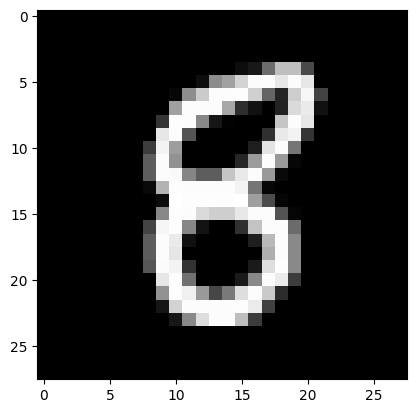

8


In [70]:
plt.imshow(X_train.iloc[1].values.reshape((28,28)), cmap='gray')
plt.show()
print(y_train.iloc[1])

In [71]:
from tensorflow import keras

In [126]:
model = keras.Sequential(
    [
        keras.layers.Dense(128, activation=keras.activations.relu, input_shape=(784,))
        ,keras.layers.Dense(128, activation=keras.activations.relu)
        ,keras.layers.Dense(128, activation=keras.activations.relu)
        ,keras.layers.Dense(128, activation=keras.activations.relu)
        ,keras.layers.Dense(128, activation=keras.activations.relu)
        ,keras.layers.Dense(128, activation=keras.activations.relu)
        ,keras.layers.Dense(10, activation=keras.activations.softmax)
    ]
)

/usr/local/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [127]:
model.compile(
    optimizer=keras.optimizers.Adam()
    ,loss=keras.losses.sparse_categorical_crossentropy
    ,metrics=[keras.metrics.Accuracy]
)

In [128]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,330 (720.04 KB)

 Trainable params: 184,330 (720.04 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
model.fit(x=X_train, y=y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: 1.3239 - val_accuracy: 0.0000e+00 - val_loss: 0.2792
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.2202 - val_accuracy: 0.0000e+00 - val_loss: 0.2010
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1439 - val_accuracy: 0.0000e+00 - val_loss: 0.1968
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1227 - val_accuracy: 0.0000e+00 - val_loss: 0.1746
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0997 - val_accuracy: 0.0000e+00 - val_loss: 0.1867
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0941 - val_accuracy: 0.0000e+00 - val_loss: 0.1712
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0838 - val_accuracy: 0.0000e+00 - val_loss: 0.1623
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/s

In [130]:
y_test_pred = model.predict(X_test).argmax(axis=1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [131]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96
